In [ ]:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.stats import f
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_excel("/content/y_output.xlsx")

In [ ]:
print(df.head())


         0           1           2           3           4           5     \
0  123.415577  123.783202  123.919502  123.970103  123.988895  123.995791   
1    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
2    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

         6           7           8           9     ...   1491   1492   1493  \
0  123.998405  123.999395  123.999771  123.999913  ...  124.0  124.0  124.0   
1    1.000000    1.000000    1.000000    1.000000  ...    1.0    1.0    1.0   
2    0.000000    0.000000    0.000000    0.000000  ...    0.0    0.0    0.0   
3    0.000000    0.000000    0.000000    0.000000  ...    0.0    0.0    0.0   
4    0.000000    0.000000    0.000000    0.000000  ...    0.0    0.0    0.0   

    1494   1495   1496   1497   1498   1499   1500  
0  124.0 

In [ ]:
print(df.shape)

(372, 1501)


In [ ]:
row_0 = df.iloc[0]

In [ ]:
print(row_0)

0       123.415577
1       123.783202
2       123.919502
3       123.970103
4       123.988895
           ...    
1496    124.000000
1497    124.000000
1498    124.000000
1499    124.000000
1500    124.000000
Name: 0, Length: 1501, dtype: float64


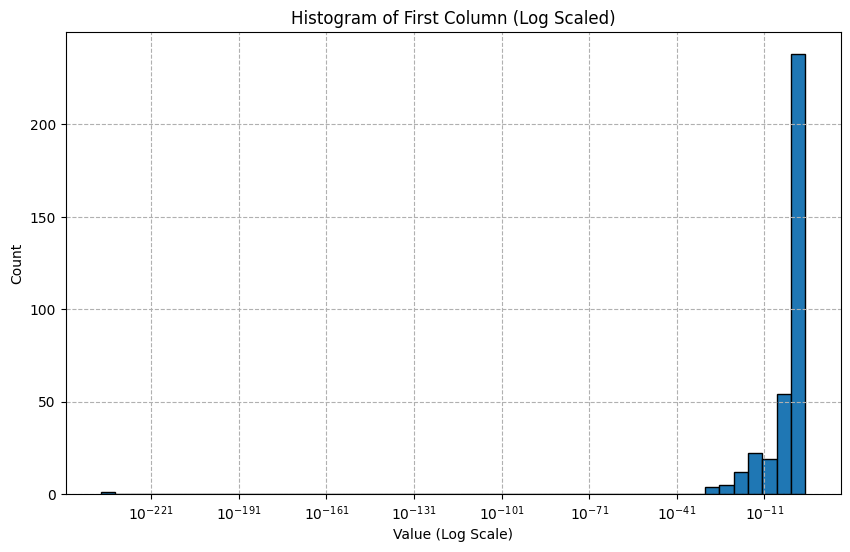

In [ ]:
values = df.iloc[:,0] # Selecting all rows from the Oth column
values = values[values>0]
plt.figure(figsize=(10, 6))
plt.hist(values, bins=np.logspace(np.log10(values.min()), np.log10(values.max()), 50), edgecolor='black')
plt.xscale('log')
plt.xlabel('Value (Log Scale)')
plt.ylabel('Count')
plt.title('Histogram of First Column (Log Scaled)')
plt.grid(True, which='both', ls='--')
plt.show()

In [ ]:

thresholds = [1e-230, 1e-100, 1e-50, 1e-10, 1e-5, 1e-2, 1, 10, 100, 325,340,500,1000,1500]

# Count how many values are above each threshold
counts = {f'>{t}': (values > t).sum() for t in thresholds}

counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

print(counts_df)


         Count
>1e-230    355
>1e-100    355
>1e-50     355
>1e-10     305
>1e-05     282
>0.01      250
>1         148
>10        110
>100        66
>325        55
>340        25
>500         7
>1000        5
>1500        0


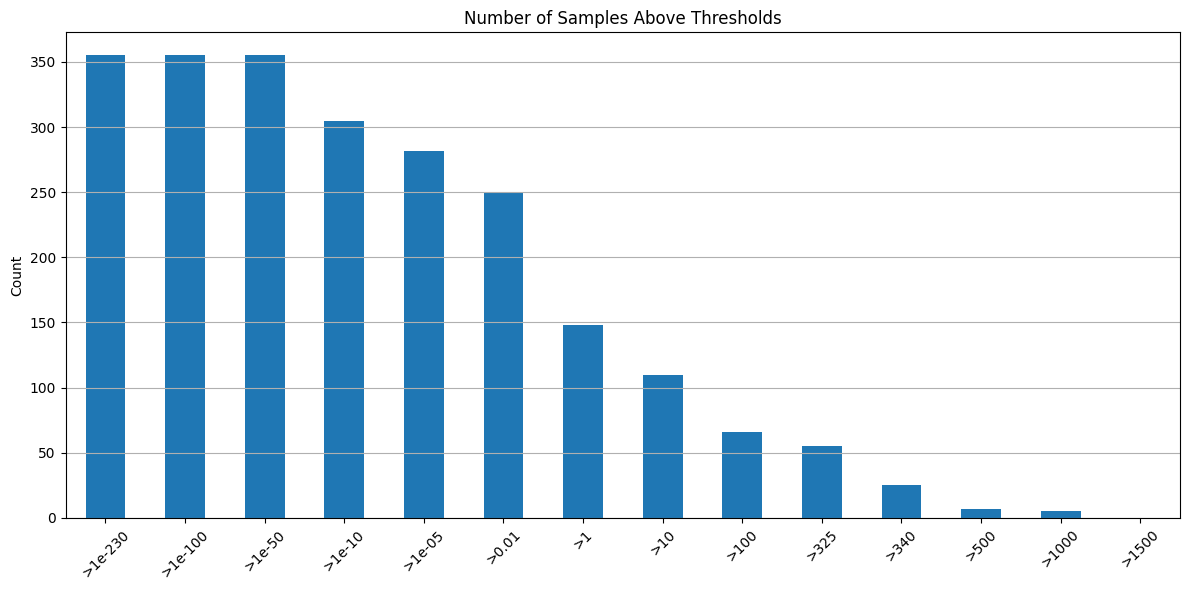

In [ ]:
counts_df.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Number of Samples Above Thresholds')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:

df = pd.read_excel('/content/y_output.xlsx', header=None)
row_std = df.std(axis=1)

# Identify rows (features) with std < threshold
constant_rows = row_std < 0.001

# Remove those rows
df_filtered = df[~constant_rows]

df_filtered.to_excel('filtered_file.xlsx', index=False)


In [ ]:
""" Variable Description
Mixer
Y(1) - F_F2, -- Flow of fresh feed to mixer after valve V1
Y(2-5) -- concentrations of A, DAA, MO, W in fresh feed to mixer
Y(6) -- temperature of fresh feed to mixer
Y(8) - flowrate into reactor from mixer from valve V2
Y(9-12) - concentrations of from mixer to reactor
Y(13) - temperature of feed from mixer to reactor
Y(367) - CV2 valve opening fraction
Reactor
Y(15) - flowrate from reactor to D1 from valve V3
Y(16-19) - concentration of reactor exit stream
Y(20) - temperature of reactor exit stream
Y(368) - CV3 valve opening fraction

Column 1 :

Y(138) - Column 1 distillate flowrate recycled to mixer
Y(139-142) - Column 1 distillate compositions
Y(143) - Column 1 distillate temperature
Y(144) - Column 1 bottoms flowrate
Y(145-148) - Column 1 bottoms composition
Y(149) - Column 1 bottoms temperature

Column 2:
Y(319) - Column 2 distillate flowrate recycled to mixer
Y(320-323) - Column 2 distillate compositions
Y(324) - Column 2 distillate temperature
(We do not take the outlet composition of column 2 as it is the product i.e. the streams where the offsepcs are present)"""

' Variable Description\nMixer  \nY(1) - F_F2, -- Flow of fresh feed to mixer after valve V1\nY(2-5) -- concentrations of A, DAA, MO, W in fresh feed to mixer\nY(6) -- temperature of fresh feed to mixer\nY(8) - flowrate into reactor from mixer from valve V2\nY(9-12) - concentrations of from mixer to reactor\nY(13) - temperature of feed from mixer to reactor\nY(367) - CV2 valve opening fraction\nReactor\nY(15) - flowrate from reactor to D1 from valve V3\nY(16-19) - concentration of reactor exit stream\nY(20) - temperature of reactor exit stream\nY(368) - CV3 valve opening fraction\n\nColumn 1 :\n\nY(138) - Column 1 distillate flowrate recycled to mixer\nY(139-142) - Column 1 distillate compositions\nY(143) - Column 1 distillate temperature\nY(144) - Column 1 bottoms flowrate\nY(145-148) - Column 1 bottoms composition\nY(149) - Column 1 bottoms temperature\n\nColumn 2:\nY(319) - Column 2 distillate flowrate recycled to mixer\nY(320-323) - Column 2 distillate compositions\nY(324) - Column 

In [ ]:
rows = [1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,138,139,140,141,142,143,144,145,146,147,148,149,319,320,321,322,323,324,367,368]

In [ ]:
row_indices = [i-1 for i in rows]

In [ ]:
filtered_df = df.iloc[row_indices]

In [ ]:
filtered_df.to_excel("Filtered_dataset.xlsx",index=False)